# Measures of Central Tendency

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.rename(columns={'SepalLengthCm': 'SL', 'SepalWidthCm': 'SW', 'PetalWidthCm': 'PW', 'PetalLengthCm': 'PL'}, inplace=True)
df.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris_setosa = df[df['Species'] == 'Iris-setosa']
iris_versicolor = df[df['Species'] == 'Iris-versicolor']
iris_virginica = df[df['Species'] == 'Iris-virginica']

### Measures of Spread

This tells how far/ how spread out is the data from the measures of central tendencies.

### 1. Range

This describes the differnece between the largest and smallest points in your data.

In [33]:
r = np.max(iris_setosa['PL']) - np.min(iris_setosa['PL'])
print(f'The Range is: {r}')

The Range is: 0.8999999999999999


### 2. Percentile

These are measures the value below which a given percentage of observations in a group observation fails.

In [36]:
np.percentile(iris_setosa['PL'], 95)
# meaninig = 95% of values in this dataset are under 'PL' = 1.7

1.7

### 3. Quartile

This is dividing the set into quarters.
- Q1 is lower Quartile (25 percentile)
- Q2 is Median (50 percentile)
- Q3 is upper Quartile (75 percentile)

In [38]:
print(np.percentile(iris_setosa['PL'], 25))
print(np.percentile(iris_setosa['PL'], 50))
print(np.percentile(iris_setosa['PL'], 75))
print(np.percentile(iris_setosa['PL'], 100))

1.4
1.5
1.5750000000000002
1.9


### 4. interquartile Range

This is basically the differnce between Q3 and Q1

In [41]:
IQR = np.percentile(iris_setosa['PL'], 75) - np.percentile(iris_setosa['PL'], 25)
print(IQR)

0.17500000000000027


### 5. Mean Absolute Deviation (MAD)

This gives the average distance of each data point from the mean. Subtract mean from all the values and take the absolute difference and then divide them by the number of values in the dataset.

### 6. Variance

This is similar to MAD but now we also take the Sqaure of the differences before dividing them by the number of values in a dataset.

#### The Problem with Variance

Because of squaring the units are also squared. Thus a better way to use this would be Standard Deviation.

### 7. Variance Vs Median Absolute Deviation (MAD)

Since MAD uses modulus, it cannot be differentiated but Variance is a smooth curve and can be differntiated.

### 8. Standard Deviation

This solves the problem with Variance. We just take the square root.

In [43]:
# we have a direct methid to get standard deviation in Numpy
np.std(iris_setosa["PL"])

0.17176728442867115

### 9. Median Absolute Deviation

The relation between Mean and Median is analogous to the realtion between Standard Deviation and Median Absolute Deviation.

Basically is Mean Absolute Deviation we subtract from mean and take mean. Here, We substract from median and then take the median at the end.

In [45]:
# this functionality is found in the statsmodels
from statsmodels import robust
robust.mad(np.array(iris_setosa['PL']))

0.14826022185056031

### 10. Standard Deviation Vs Median Absolute Deviation

Similar to mean and median, outliers affect the Standard Deviation more than Median Absolute Deviation.

### 11. Box Plots

In a Box plot it becomes very easy to detect outliers. Since internally the system calculates the min() and the max() using the IQR.

- min = Q1 - 1.5IQR
- max = Q3 + 1.5IQR

Anything outside this range will be considered as outlier. Which is generally true in most cases.

<Axes: >

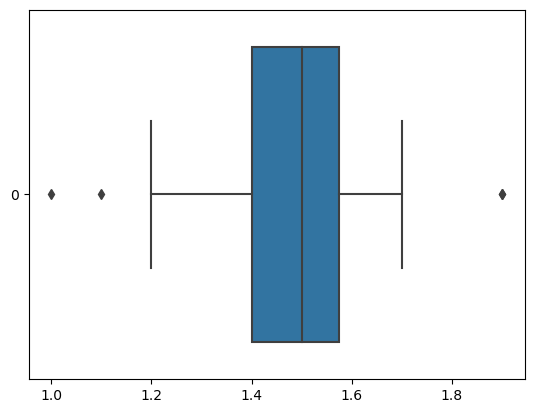

In [49]:
sns.boxplot(iris_setosa['PL'], orient='h')
# note that we found out that there are three potential outliers

<Axes: xlabel='Species', ylabel='PL'>

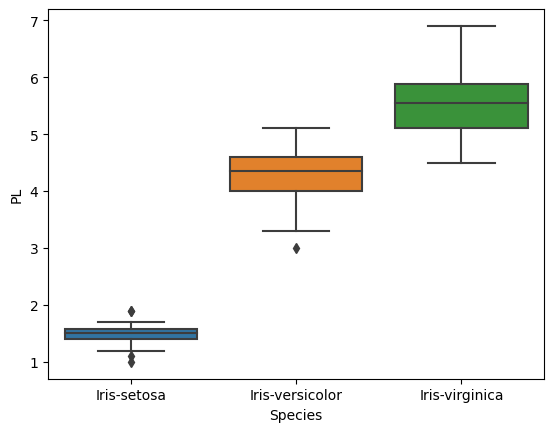

In [50]:
# box plots can be generated for categorical data as well
sns.boxplot(x='Species', y='PL', data=df)